# 01. Bibliotecas

In [55]:
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd

# 02. Caminho

In [57]:
BASE_DIR = Path.cwd()
print(f"Verificando o caminho: {BASE_DIR}")

Verificando o caminho: c:\Users\Juan\Desktop\SCIENTIA\01_MARKETING\YOUTUBE\01_python\Python\notebook


In [58]:
BASE_DIR = Path.cwd().parent
print(f"Verificando o caminho: {BASE_DIR}")

Verificando o caminho: c:\Users\Juan\Desktop\SCIENTIA\01_MARKETING\YOUTUBE\01_python\Python


In [59]:
DATA_DIR = BASE_DIR / "data"
report = "resultado.csv"

file = DATA_DIR / report
print(f"Verificando o caminho completo até o arquivo: {file}")

Verificando o caminho completo até o arquivo: c:\Users\Juan\Desktop\SCIENTIA\01_MARKETING\YOUTUBE\01_python\Python\data\resultado.csv


In [61]:
df = pd.read_csv(file, sep  = ';' )
df.head(2)

,data,vendedor,cidade,produto,quantidade,preço,total
0,2024-05-01,Ana,São Paulo,Notebook,2,3500,7000
1,2024-06-01,Bruno,Rio de Janeiro,Mouse,5,80,400


# 03. Reports

## 03.1. Gráfico de linhas

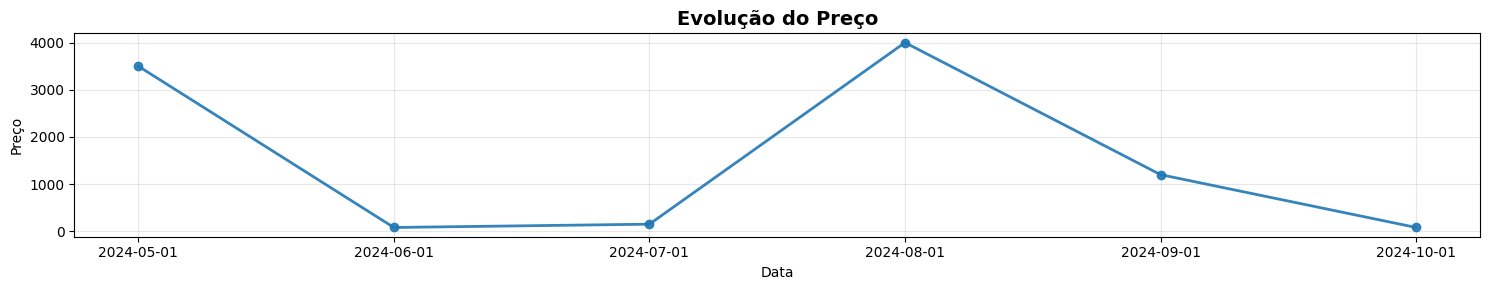

In [68]:
plt.figure(figsize=(15, 3))

plt.plot(
    df['data'],
    df['preço'],
    marker='o',
    linewidth=2,
    alpha=0.9
)

plt.title("Evolução do Preço", fontsize=14, weight='bold')
plt.xlabel("Data")
plt.ylabel("Preço")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 📈 Gráfico de Linha — Evolução do Preço ao Longo do Tempo

Este gráfico de linha representa a **evolução do preço ao longo do tempo**, com ajustes visuais para melhorar a leitura.

- O eixo X representa as datas.
- O eixo Y representa os valores de preço.
- Marcadores destacam cada ponto da série temporal.
- A grade sutil auxilia na comparação dos valores.
- O layout é ajustado para garantir clareza visual.

📌 **Insight:**  
Permite acompanhar a variação do preço ao longo do tempo e identificar tendências ou mudanças de comportamento.


## 03.2. Gráfico de Barras

<i> Ótima opção para mostrar como algumas quantidades variam em um conjunto discreto de itens. </i>

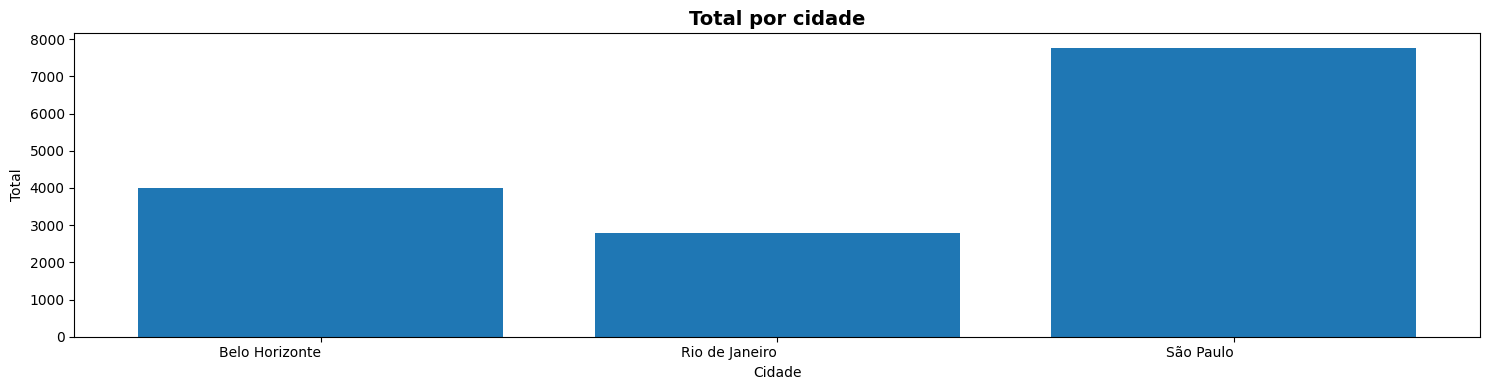

In [71]:
df_agg = (
    df
    .groupby('cidade', as_index=False)['total']
    .sum()
)

plt.figure(figsize=(15, 4))

plt.bar(
    df_agg['cidade'],
    df_agg['total']
)

plt.title("Total por cidade", fontsize=14, weight='bold')
plt.xlabel("Cidade")
plt.ylabel("Total")

plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()



### 📊 Gráfico de Barras — Total por Cidade

Este gráfico de barras mostra o **valor total de vendas agregado por cidade**, após o processamento dos dados com Pandas.

- Os dados são agrupados pela coluna `cidade` e somados a partir da coluna `total`.
- As barras representam o total acumulado de vendas por cidade.
- Os rótulos do eixo X são rotacionados para evitar sobreposição.
- O layout é ajustado para garantir melhor legibilidade.

📌 **Insight:**  
Permite comparar rapidamente o volume total de vendas entre as cidades, destacando aquelas com maior concentração de valores.


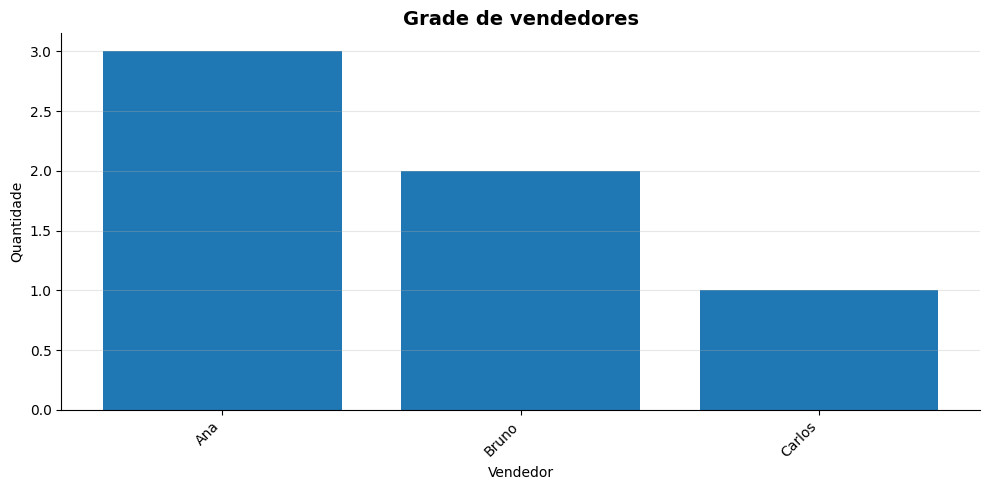

In [38]:
# contagem
grade = df[df['total'] > 0]

grade = df['vendedor'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(10, 5))

plt.bar(
    grade.index,
    grade.values
)

plt.grid(axis='y', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title("Grade de vendedores", fontsize=14, weight='bold')
plt.xlabel("Vendedor")
plt.ylabel("Quantidade")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### 📊 Gráfico de Barras — Grade de Vendedores

Este gráfico apresenta a **quantidade de registros por vendedor**, permitindo comparar rapidamente o volume de vendas entre eles.

- Os dados são agregados utilizando `value_counts()`.
- As barras representam o total de ocorrências por vendedor.
- Os rótulos do eixo X são rotacionados para melhorar a leitura.
- O layout é ajustado para garantir boa visualização.

📌 **Insight:**  
Facilita a identificação dos vendedores com maior participação na base de dados.

## 03.3 Histograma

<i>Ótima opção para valores númericos agrupados.</i>

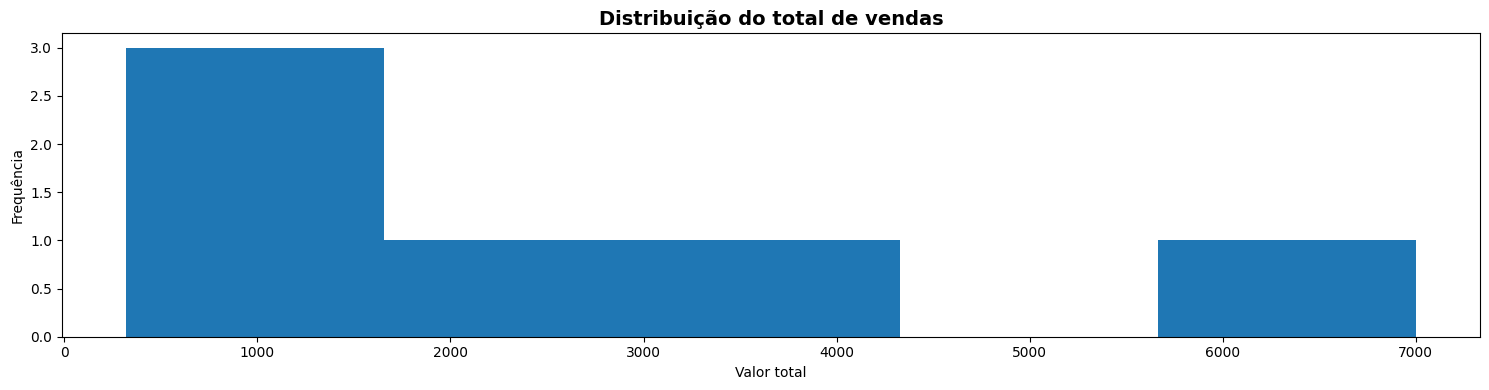

In [39]:
# Filtra valores positivos
h = df[df['total'] > 0]

# Group By (exemplo por data)
g = (
    h
    .groupby('data', as_index=False)['total']
    .sum()
)

# Gráfico
plt.figure(figsize=(15, 4))

plt.hist(
    g['total'],
    bins=5
)

plt.title("Distribuição do total de vendas", fontsize=14, weight='bold')
plt.xlabel("Valor total")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


### 📊 Histograma — Distribuição do Total de Vendas

Este histograma mostra a **distribuição dos valores totais de vendas**, considerando apenas registros com valor maior que zero.

- Os dados são filtrados para excluir valores inválidos (*total > 0*).
- Os valores são agrupados em **5 intervalos (bins)**.
- O eixo X representa os valores de venda.
- O eixo Y indica a frequência de ocorrências.
- Ajustes visuais garantem melhor legibilidade do gráfico.

📌 **Insight:**  
Permite identificar a concentração dos valores de venda e observar a dispersão dos dados.

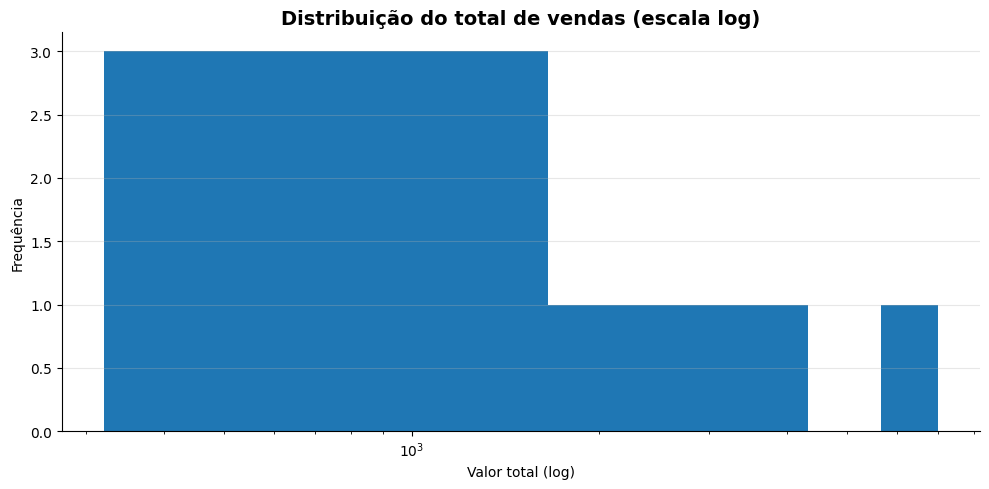

In [40]:
plt.figure(figsize=(10, 5))

plt.hist(
    h['total'],
    bins=5
)

plt.xscale('log')

plt.title("Distribuição do total de vendas (escala log)", fontsize=14, weight='bold')
plt.xlabel("Valor total (log)")
plt.ylabel("Frequência")

plt.grid(axis='y', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


### 📊 Histograma — Distribuição do Total de Vendas (Escala Log)

Este histograma apresenta a **distribuição dos valores totais de vendas em escala logarítmica**, facilitando a análise de dados com grande variação.

- Os valores de venda são agrupados em **5 intervalos (bins)**.
- A escala logarítmica no eixo X reduz o impacto de valores extremos.
- O eixo Y representa a frequência de ocorrências.
- Elementos visuais desnecessários foram removidos para maior clareza.

📌 **Insight:**  
A escala log permite observar melhor a distribuição quando há concentração de valores baixos e poucos valores muito elevados.

## 04. Dispersão

<i> A **dispersão** Ideal para explicar as relações entre pares de conjuntos de dados:</i>

- Correlação (positiva, negativa ou inexistente)
- Padrões
- Outliers
- Tendências lineares ou não lineares

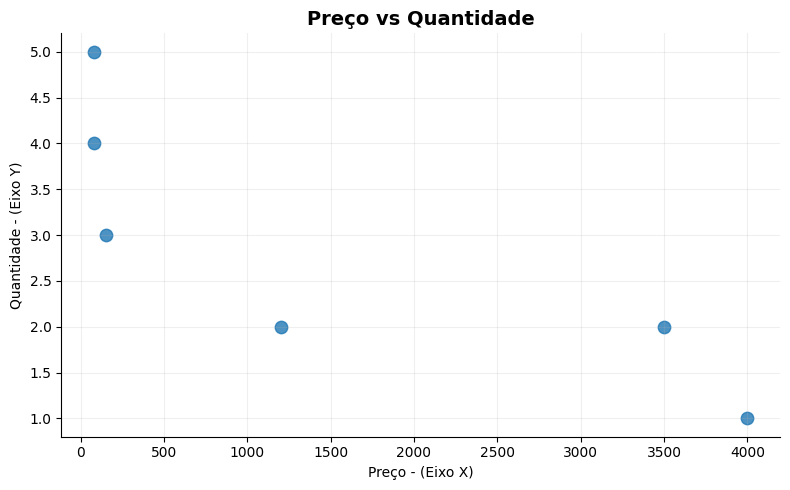

In [41]:
plt.figure(figsize=(8, 5))

plt.scatter(
    df['preço'],
    df['quantidade'],
    s=80,        # tamanho dos pontos
    alpha=0.8
)

plt.grid(True, alpha=0.2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title("Preço vs Quantidade", fontsize=14, weight='bold')
plt.xlabel("Preço - (Eixo X)")
plt.ylabel("Quantidade - (Eixo Y)")

plt.tight_layout()
plt.show()


### 📊 Gráfico de Dispersão — Preço vs Quantidade

Este gráfico de dispersão mostra a **relação entre o preço dos produtos e a quantidade vendida**, com ajustes visuais voltados à legibilidade.

- Cada ponto representa uma observação da base de dados.
- O tamanho e a transparência dos pontos facilitam a visualização de sobreposições.
- A grade sutil auxilia na leitura dos valores.
- Elementos visuais desnecessários foram removidos para maior clareza.

📌 **Insight:**  
Ajuda a identificar padrões, tendências ou possíveis outliers na relação entre preço e quantidade.

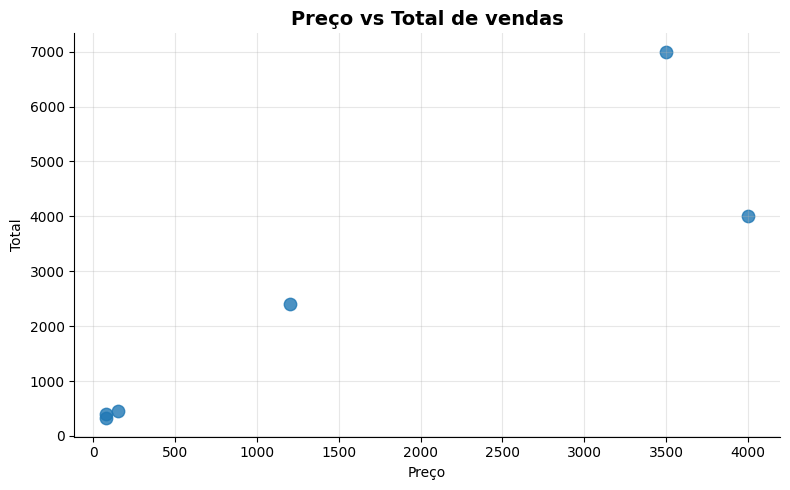

In [42]:
plt.figure(figsize=(8, 5))

plt.scatter(
    df['preço'],
    df['total'],
    s=80,
    alpha=0.8
)

plt.title("Preço vs Total de vendas", fontsize=14, weight='bold')
plt.xlabel("Preço")
plt.ylabel("Total")

plt.grid(True, alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


### 📊 Gráfico de Dispersão — Preço vs Total de Vendas

Este gráfico de dispersão apresenta a **relação entre o preço dos produtos e o total de vendas**, com foco em clareza e leitura visual.

- Cada ponto representa uma venda registrada.
- O uso de transparência reduz a sobreposição entre pontos.
- A grade auxilia na comparação dos valores.
- Elementos visuais excessivos foram removidos para manter o gráfico limpo.

📌 **Insight:**  
Permite analisar como o preço impacta o valor total das vendas, além de identificar padrões e possíveis comportamentos atípicos.


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# variáveis
x = df['preço']
y = df['quantidade']

# regressão linear (y = ax + b)
coef = np.polyfit(x, y, 1)
a, b = coef

# reta
y_pred = a * x + b

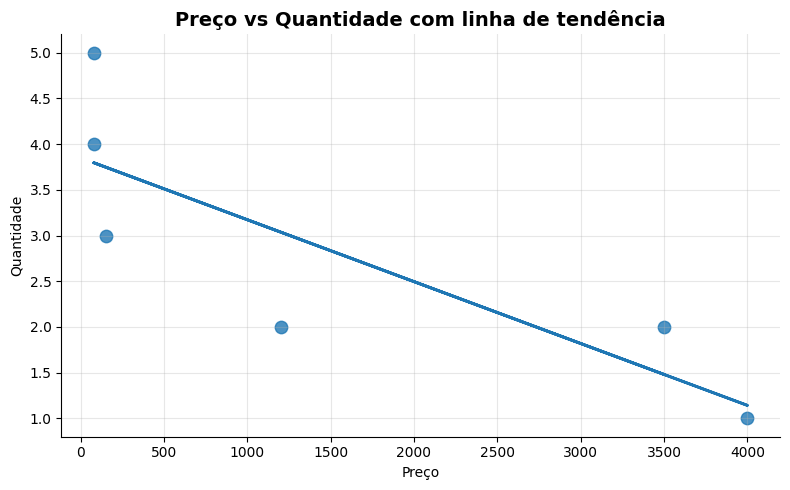

In [44]:
plt.figure(figsize=(8, 5))

# pontos
plt.scatter(
    x,
    y,
    s=80,
    alpha=0.8
)

# reta de tendência
plt.plot(
    x,
    y_pred,
    linewidth=2
)

plt.title("Preço vs Quantidade com linha de tendência", fontsize=14, weight='bold')
plt.xlabel("Preço")
plt.ylabel("Quantidade")

plt.grid(True, alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


### 📈 Gráfico de Dispersão — Preço vs Quantidade com Linha de Tendência

Este gráfico combina um **gráfico de dispersão** com uma **reta de regressão linear**, permitindo analisar a relação entre **preço** e **quantidade vendida**.

- **`np.polyfit(x, y, 1)`**  
  Calcula os coeficientes da regressão linear (*y = ax + b*).

- **`y_pred = a * x + b`**  
  Gera os valores estimados da linha de tendência.

- **`plt.scatter()`**  
  Exibe os pontos reais da base de dados.

- **`plt.plot()`**  
  Desenha a reta de tendência sobre os pontos.

- **Ajustes visuais** *(grade, remoção de bordas e espaçamento)*  
  Melhoram a legibilidade do gráfico.

📌 **Insight:**  
A linha de tendência facilita a identificação de correlação entre preço e quantidade, ajudando a avaliar se variações de preço impactam o volume vendido.
